# HOM notebook

The objective of the notebook is to test the indistinguishability of photons. We want if two photons are sent, will they necessarily arrive on the same side? Are they indistinguishable like you can see on this animation:

![Hong-Ou-Mandel effect](./HOM2.gif)

In the first place, we need to import all the libraries we will use in this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import perceval as pcvl
import perceval.lib.phys as phys

### Introduction

We are going to use a backend to simulate the behaviour of our optical device.
In Perceval, four backends are implemented. We are going to use one of those : The `Naive` backend.

This back-end implements direct permanent calculation and is therefore suited for single output probability computation with small memory cost. We use `CircuitAnalyser` to analyse the performance of the gate.

The next cell allows us to call this `Naive` backend:

In [12]:
simulator_backend = pcvl.BackendFactory().get_backend('Naive')

We will call the input `input_state` and create a `BasicState` from the Perceval library with one photon on the first branch and the another photon on the second branch of the circuit.

In [17]:
input_state=pcvl.BasicState("|1,1>")

We will start by displaying one of the main components of the circuit that interests us: the beam-splitter alias BS

To display any components, we use `pdisplay`:

Here is an example for the BS: 

In [2]:
pcvl.pdisplay(phys.BS())

In [7]:
phys.BS().U

Matrix([
[sqrt(2)/2,  sqrt(2)/2],
[sqrt(2)/2, -sqrt(2)/2]])

A beam-splitter can take in argument a coefficient of reflectivity R. This coefficient changes the unitary matrix of the circuit :

In [ ]:
phys.BS(R=3/2).U

The second main component of our circuit is the phase shifter alias PS. We have to specify the phase of the PS as argument.

In [10]:
pcvl.pdisplay(phys.PS(phi=.4))

Now, let's simulate the distribution obtained when we input a single photon in a beam-splitter with our `Naive` backend.

We are going to use the `simulator_backend` defined at the beginning. We want to use the class `Circuit Analyser` which has three arguments:

- The first one is the transfer matrix of the circuit with simulator_backend??
- The second one is the input state (we will use `input_state`).
- The third one is the desired output states (detail why we put a star, cf below).

Then, it is possible to display the result of `Circuit Analyser` via `pdisplay`.

In [19]:
sim = simulator_backend(phys.BS().U)
ca = pcvl.CircuitAnalyser(sim,
                          [input_state],
                          "*")
pcvl.pdisplay(ca)

,"|2,0>","|1,1>","|0,2>"
"|1,1>",1/2,0,1/2


With the probabilities we get, what can we deduce?

"something about the distinguishability of the photons"

If you want to analyse only few outputs, you should not use ' * ': It's called the post-selection.
Try to do it only for |2,0> and |0,2> : Replace ' * ' by `[pcvl.BasicState("|2,0>"), pcvl.BasicState("|0,2>")]`

In [ ]:
"""sim = simulator_backend(a.U)
ca2 = pcvl.CircuitAnalyser(sim,
                              [pcvl.AnnotatedBasicState(input_state)],
                              [pcvl.BasicState("|2,0>"), pcvl.BasicState("|0,2>")])
pcvl.pdisplay(ca2)"""

In Perceval, `CircuitAnalyser` is a class that has methods. You can print all the states you analyse in output with :

In [20]:
print([str(state) for state in ca.output_states_list])

['|2,0>', '|1,1>', '|0,2>']


You also can print the each probability of those states using :

In [21]:
print(ca.distribution)

[[0.5 0.  0.5]]


### MZI circuit

In this second part, we want to display the Mach-Zendher Interferometer circuit composed of two blocks of a phase-shifter and a beam-splitter each:

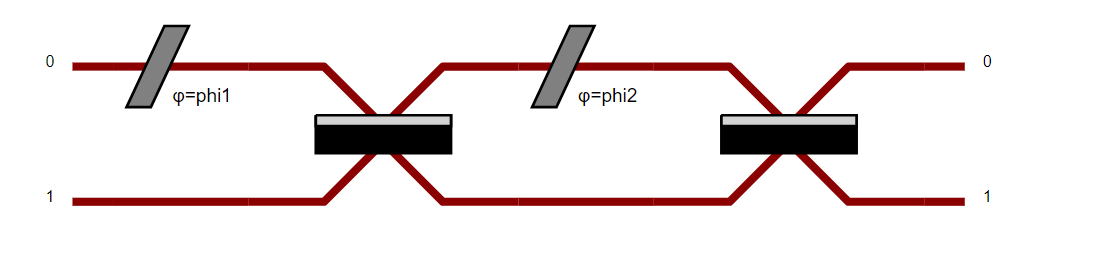

Start by defining the number of modes (2) and the name of your circuit ('mzi'). Then, add phases parameters for the PS, you can call them $\phi$1 et $\phi$2.

Before doing the MZI circuit all by yourself, we will show you an example on a smaller circuit.

In [7]:
circuit = pcvl.Circuit(2,name='example')

phase = pcvl.Parameter("phi")
circuit.add((0,1), phys.BS()).add(0, phys.PS(phase))

pcvl.pdisplay(circuit)
circuit.U

We can also add a specific value to the phi parameter using `set_value`.

In [ ]:
phase.set_value(np.pi/4)

We can print the unitary matrix associated to this circuit and see the changes:

In [ ]:
circuit.U

Its' your turn to play ! Create the MZI interferometer as `pcvl.Circuit` object and display it. It should look like the picture above.

In [10]:
mzi_chip = pcvl.Circuit()
"""Fill in the gap (don't forget to fill the gap in pcvl.Circuit() above too)"""
pcvl.pdisplay(mzi_chip)

Then, print the associated unitary matrix using `pdisplay` (remember that we can get the unitary matrix associated with a `pcvl.Circuit()` with the method `.U`):

In [6]:
"pcvl.pdisplay(mzi_chip.U)"

Now, we are going to do the exact same simulation that we did for the BS but this time for our MZI circuit.

Let's attribute values to the phases using `set_value`. The first phase will be zero and the second one will be $\frac{\pi}{2}$

In [11]:
"""phases[0].set_value(0)
phases[1].set_value(np.pi/2)"""

The input_state is still one photon on the first branch and one photon on the second branch. The output states are also still ' * '

In [15]:
"""sim = simulator_backend(mzi_chip.U)

ca = pcvl.CircuitAnalyser(sim,
                              [pcvl.AnnotatedBasicState(input_state)],
                              "*")

pcvl.pdisplay(ca)
"""

'sim = simulator_backend(mzi_chip.U)\n\nca = pcvl.CircuitAnalyser(sim,\n                              [pcvl.AnnotatedBasicState(input_state)],\n                              "*")\nca.compute()\nnb_of_outputs = len(ca.output_states_list)\n\npcvl.pdisplay(ca)'

### Graph of the probability in function of the phase 

In this last part, we want to obtain this graph : 


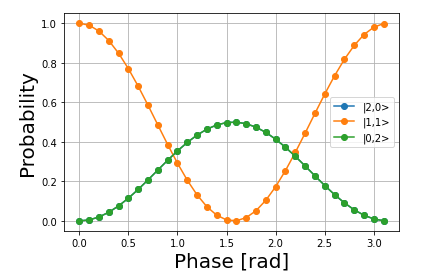

### Collecting data

The phases of the PS should vary between 0 and $\pi$ with a step of 0.1.

In [ ]:
scan_range = "fill in the gap"

This gives you the number of outputs `CircuitAnalyser` will calculate : 

In [ ]:
nb_of_outputs = len(ca.output_states_list)

For your graph, you need to create a liste to store the each output probability as a function of the phase. 

In [ ]:
output = """fill in the gap"""

Then, you can do a for loop that explores the phi in their interval defined above:

- First, set the phase of the MZI with `set_value`
- Then, run the `CircuitAnalyser` for your MZI 
- And finally, append the result to the output to plot

In [18]:
"""for phi in scan_range:

    # Set the phase of the MZI
    phases[1].set_value(phi)

    # Run the analyser
    sim = simulator_backend(mzi_chip.U)
    ca = pcvl.CircuitAnalyser(sim,
                              [pcvl.AnnotatedBasicState(input_state)],
                              "*")
    """
    # Append the result to the ouput to plot
    for i in range(len(output)):
        output[i].append(ca.distribution[0][i])


NameError: name 'ca' is not defined

### Plot

Here is the plot of probability as a function of the phase for each output.
The x-axis should be the variation of the phi phases between 0 and $\pi$ with a 0.1 step.
The y-axis should be each value of this output list.

In [2]:
plt.figure()
for i, out in enumerate(output):
    plt.plot(scan_range, out, '-o', label=ca.output_states_list[i])
plt.xlabel('Phase [rad]', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.grid()
plt.legend()

"plt.figure()\nfor i, out in enumerate(output):\n    plt.plot(scan_range, out, '-o', label=ca.output_states_list[i])\nplt.xlabel('Phase [rad]', fontsize=20)\nplt.ylabel('Probability', fontsize=20)\nplt.grid()\nplt.legend()"